In [9]:
using CausalForest
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


In [4]:
indices,X,T,Y = load_data("causal");
Xtest = rand(Float64, (1000, size(X, 2)));
Xtest[:, 1] =  LinRange(0, 1, 1000);
true_effect = Xtest[:, 1].>0.5;

In [5]:
cf1 = build_forest(false, false, false, Y, T, X, -1, 100);
pred1 = apply_forest(cf1, Xtest);

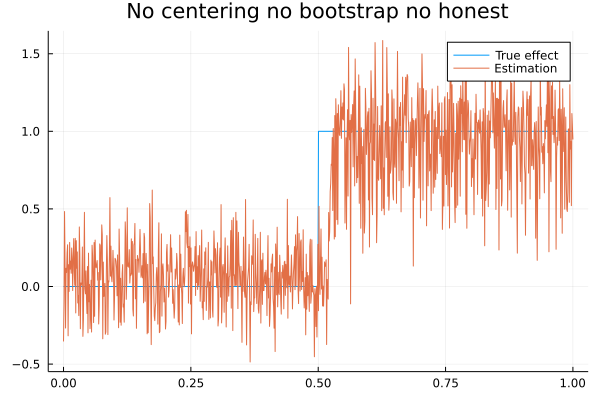

In [18]:
plot(Xtest[:, 1], [true_effect, pred1], label=["True effect" "Estimation"], title = "No centering no bootstrap no honest")

In [17]:
cf2 = build_forest(true, false, false, Y, T, X, -1, 100);
pred2 = apply_forest(cf2, Xtest);

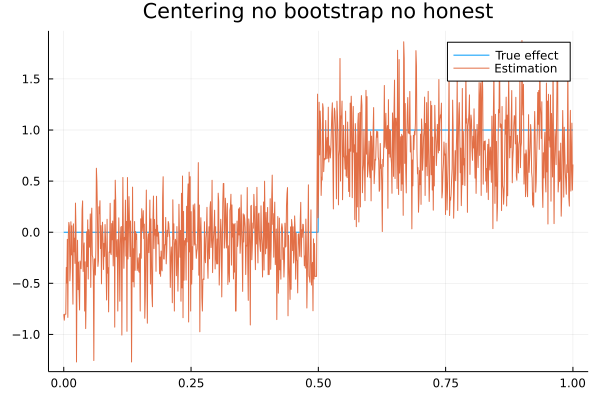

In [19]:
plot(Xtest[:, 1], [true_effect, pred2], label=["True effect" "Estimation"], title = "Centering no bootstrap no honest")